In [1]:
# example adapted from
# https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from utils import *

%load_ext autoreload
%autoreload 2

# Exemple

In [2]:
# define notebook parameters
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

# example matrix
A = np.array([
    [-1, -2],
    [3, -4]
])

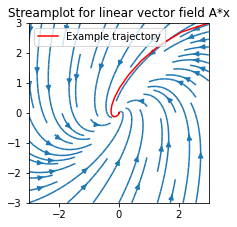

In [3]:
# example for Euler's method to construct and plot a trajectory over the stream plot
y0 = np.array([3, 3])
time = np.linspace(0, 10, 100)
yt, time = solve_euler(lambda y: A@y, y0, time)

# example linear vector field A*x
ax0 = plot_phase_portrait(A, X, Y)

# then plot the trajectory over it
ax0.plot(yt[:, 0], yt[:, 1], c='red', label='Example trajectory')

# prettify
ax0.legend()
ax0.set_aspect(1)

# Task 5

In [2]:
from sir_model import model

In [3]:
SIR_0a = np.array([195.3, 0.052, 4.40])
SIR_0b = np.array([195.7, 0.030, 3.92])
SIR_0c = np.array([193.0, 0.080, 6.21])

bs = np.linspace(0.01, 0.03, 21)
ts = np.linspace(0, 10000, 100000)

In [80]:
mu0 = 10.0
mu1=10.45
beta=11.5
A=20
d=0.1
nu=1.0
b=0.022

### 3 - Visualisations

Text(0.5, 0, 'Recovered')

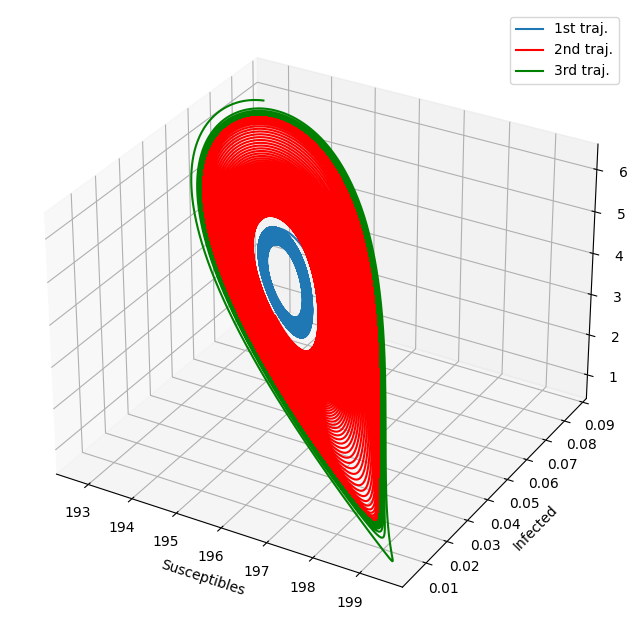

In [101]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

SIR_model = lambda y: model(y)
yta, _ = solve_scipy(SIR_model, SIR_0a, ts)
ytb, _ = solve_scipy(SIR_model, SIR_0b, ts)
ytc, _ = solve_scipy(SIR_model, SIR_0c, ts)
ax.plot3D(yta[0, :], yta[1, :], yta[2, :])
ax.plot3D(ytb[0, :], ytb[1, :], ytb[2, :], c='red')
ax.plot3D(ytc[0, :], ytc[1, :], ytc[2, :], c='green')
ax.legend(["1st traj.", "2nd traj.", "3rd traj."])

ax.set_xlabel("Susceptibles")
ax.set_ylabel("Infected")
ax.set_zlabel("Recovered")



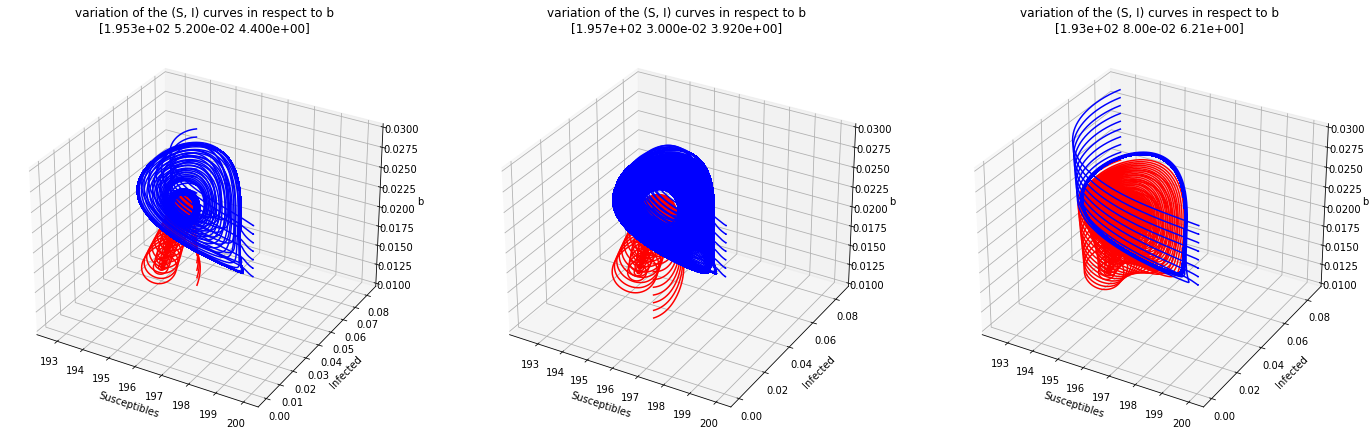

In [12]:
fig = plt.figure(figsize=(24, 8))

ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title(f"variation of the (S, I) curves in respect to b\n{SIR_0a}")
ax1.set_xlabel("Susceptibles")
ax1.set_ylabel("Infected")
ax1.set_zlabel("b")

for b in bs:
    SIR_model = lambda y: model(y, b=b)
    yta, _ = solve_scipy(SIR_model, SIR_0a, ts)
    c = "red" if b < 0.022 else "blue"
    ax1.plot3D(yta[0, :], yta[1, :], b, c=c)

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title(f"variation of the (S, I) curves in respect to b\n{SIR_0b}")
ax2.set_xlabel("Susceptibles")
ax2.set_ylabel("Infected")
ax2.set_zlabel("b")

for b in bs:
    SIR_model = lambda y: model(y, b=b)
    yta, _ = solve_scipy(SIR_model, SIR_0b, ts)
    c = "red" if b < 0.022 else "blue"
    ax2.plot3D(yta[0, :], yta[1, :], b, c=c)

ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title(f"variation of the (S, I) curves in respect to b\n{SIR_0c}")
ax3.set_xlabel("Susceptibles")
ax3.set_ylabel("Infected")
ax3.set_zlabel("b")

for b in bs:
    SIR_model = lambda y: model(y, b=b)
    yta, _ = solve_scipy(SIR_model, SIR_0c, ts)
    c = "red" if b < 0.022 else "blue"
    ax3.plot3D(yta[0, :], yta[1, :], b, c=c)



### 4 - Bifurcation on b parameter

In [92]:
from sir_model import h, I2, hopf_bif_func
from scipy.optimize import fsolve

In [93]:
f_ = lambda b: hopf_bif_func(b, mu0, mu1, beta, A, d, nu)
# Solve for the zero(s) of f(b), which gives the point of bifurcation on the paramter b
b_bif = fsolve(f_, 0.022) # We know 0.022 is close to the answer
print(f"Bifurcation happens at b={b_bif[0]:.4f}")

Bifurcation happens at b=0.0221


In [89]:
print(f"for b=0.022, I2={I2(mu0, mu1, beta, A, d, nu, 0.022):.4f}")
h_ = lambda i: h(i, mu0, mu1, beta, A, d, nu, 0.022)
_, hM = fsolve(h_, [0.0, 0.05])
print(f"for b=0.022, H_M={hM:.4f}")

for b=0.022, I2=0.0412
for b=0.022, H_M=0.0409


## 6 - $E_0$ as an attracting node

In [90]:
from sir_model import R0

In [91]:
print(f"Basic reproduction rate : {R0(beta, d, nu, mu1):.3f}")
SIR_EO = np.array([A / d, 0, 0])


Basic reproduction rate : 0.996


In [121]:
vars = [[-50, 0, 0], [-50, 0, 25], [-10, 2, 0], [-25, 2, 25], [-40, 1, 40]]

SIR_model = lambda y: model(y, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu, b=b)

ytas = []
for var in vars:
    yta, _ = solve_scipy(SIR_model, SIR_EO + np.array(var), ts)
    ytas.append(yta)

Text(0.5, 0.92, 'Trajectories of Different Variations around E0 = (200, 0, 0)')

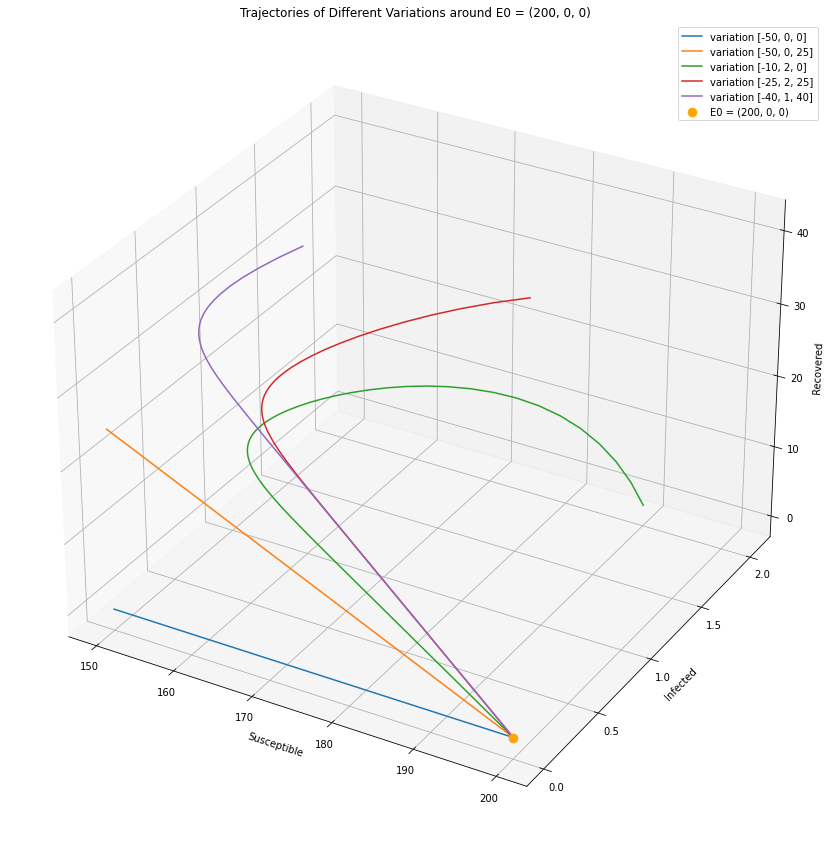

In [122]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
for yta in ytas:
    ax.plot3D(yta[0, :], yta[1, :], yta[2, :])
ax.scatter3D(SIR_EO[0], SIR_EO[1], SIR_EO[2], marker=".", s=300, c='orange')
ax.legend([f"variation {var}" for var in vars] + ["E0 = (200, 0, 0)"])
ax.set_xlabel("Susceptible")
ax.set_ylabel("Infected")
ax.set_zlabel("Recovered")
ax.set_title("Trajectories of Different Variations around E0 = (200, 0, 0)")